In [1]:
import pandas as pd 
from sklearn.decomposition import KernelPCA 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import numpy as np
import plotly.express as px
import nbformat
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import shap
from reg_resampler import resampler
import plotly.graph_objects as go
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
from imblearn.combine import SMOTEENN
import pickle
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


d:\anaconda\envs\Master_thesis\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd 
from protlearn.features import aac
from protlearn.features import aaindex1
from protlearn.features import ngram
from protlearn.features import entropy
from protlearn.features import atc
from protlearn.features import ctd
from protlearn.features import ctdc
from protlearn.features import ctdt
from protlearn.features import apaac
from protlearn.features import moreau_broto
from protlearn.features import moran
from protlearn.features import geary
from protlearn.features import paac
from protlearn.features import socn
from protlearn.features import cksaap
from protlearn.features import ctdd
from protlearn.features import qso

def entropy_input(seq):
   try:
      value = entropy(seq)
   except:
      value = 'NaN'
   return value
def entropy_input(seq):
   try:
      value = entropy(seq)
   except:
      value = 'NaN'
   return value

def feature_extractions(seq):
    
    feature_extraction_0 = pd.DataFrame(columns = ['seqs'])
    feature_extraction_0['seqs'] = seq
    
    comp, aa = aac(seq, remove_zero_cols=False)
    feature_extraction = pd.DataFrame(comp ,columns = ["A","C","D","E","F","G","H","I","K","L","M",
                                                       "N","P","Q","R","S","T","V","W","Y"])
    aaind, inds = aaindex1(seq, standardize='zscore')
    feature_extraction_2 = pd.DataFrame(aaind ,columns = inds)
    
    di, ngrams = ngram(seq, n=2, method='absolute')
    feature_extraction_3 = pd.DataFrame(di ,columns = ngrams)

    tri, ngrams = ngram(seq, n=3, method='relative')
    feature_extraction_4 = pd.DataFrame(tri ,columns = ngrams)

    frames = [feature_extraction_0,feature_extraction, feature_extraction_2,feature_extraction_3,feature_extraction_4]
    extracted_data_0 = pd.concat(frames,axis =1)
    extracted_data_0["entropy"] = extracted_data_0["seqs"].apply(entropy_input)

    atoms, bonds = atc(seq)
    feature_extraction_5 = pd.DataFrame(atoms,columns = ["atom_1","atom_2","atom_3","atom_4","atom_5"])
    feature_extraction_6 = pd.DataFrame(bonds,columns = ["bond_1","bond_2","bond_3"])

    c, desc = ctdc(seq)
    feature_extraction_7 = pd.DataFrame(c,columns = desc)

    t, desc = ctdt(seq)
    feature_extraction_8 = pd.DataFrame(t,columns = desc)

    frames = [extracted_data_0,feature_extraction_5,feature_extraction_6,feature_extraction_7,feature_extraction_8]
    extracted_data_1 = pd.concat(frames,axis =1)

    mb = moreau_broto(seq) # ERROR NOTICE
    feature_extraction_9 = pd.DataFrame(mb,columns = ["M_br_1","M_br_2","M_br_3","M_br_4","M_br_5",
                                                    "M_br_6","M_br_7","M_br_8"])
    
    mo = moran(seq) 
    feature_extraction_10 = pd.DataFrame(mo,columns = ["M_o_1","M_o_2","M_o_3","M_o_4","M_o_5",
                                                    "M_o_6","M_o_7","M_o_8"])
    
    gr = geary(seq) 
    feature_extraction_11 = pd.DataFrame(gr,columns = ["g_r_1","g_r_2","g_r_3","g_r_4","g_r_5",
                                                    "g_r_6","g_r_7","g_r_8"])
    
    paac_comp, desc = paac(seq, lambda_=30, remove_zero_cols= False)
    feature_extraction_12 = pd.DataFrame(paac_comp,columns = desc)

    apaac_comp, desc = apaac(seq, lambda_=30, remove_zero_cols= False)
    feature_extraction_13 = pd.DataFrame(apaac_comp,columns = desc)

    frames = [extracted_data_1,feature_extraction_10,feature_extraction_11,feature_extraction_12,feature_extraction_13]
    extracted_data_2 = pd.concat(frames,axis =1)

    ck, pairs = cksaap(seq, remove_zero_cols=False)
    feature_extraction_14 = pd.DataFrame(ck,columns = pairs)

    sw, g = socn(seq)

    feature_extraction_15 = pd.DataFrame(g,columns =    ["g_1","g_2","g_3","g_4","g_5","g_6",
                                                     "g_7","g_8","g_9","g_10","g_11","g_12",
                                                     "g_13","g_14","g_15","g_16","g_17","g_18",
                                                     "g_19","g_20","g_21","g_22","g_23","g_24",
                                                     "g_25","g_26","g_27","g_28","g_29","g_30"])
    
    feature_extraction_16 = pd.DataFrame(sw,columns = ["sw_1","sw_2","sw_3","sw_4","sw_5","sw_6",
                                                     "sw_7","sw_8","sw_9","sw_10","sw_11","sw_12",
                                                     "sw_13","sw_14","sw_15","sw_16","sw_17","sw_18",
                                                     "sw_19","sw_20","sw_21","sw_22","sw_23","sw_24",
                                                     "sw_25","sw_26","sw_27","sw_28","sw_29","sw_30"])

    
    d, desc = ctdd(seq)
    feature_extraction_17 = pd.DataFrame(d,columns = desc)

    

    qsw, qg, desc = qso(seq, d=30, remove_zero_cols=False)
    feature_extraction_18 = pd.DataFrame(qsw,columns = desc)
    feature_extraction_19 = pd.DataFrame(qg,columns = desc)

    frames = [extracted_data_2,feature_extraction_14,feature_extraction_15,feature_extraction_16,feature_extraction_17,feature_extraction_18,feature_extraction_19]
    extracted_data_3 = pd.concat(frames,axis =1)

    extracted_data_3.to_csv("data/run_ext_data.csv")
    extracted_data_3 = pd.read_csv("data/run_ext_data.csv")
    return extracted_data_3

In [3]:
import torch

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 2080
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [5]:
ex_data_set = pd.read_csv("data/new_all_features.csv")

In [6]:
ex_data_set

Unnamed: 0  OBSERVATION                                ORGANISM  \
0              0            9                    Candida parapsilosis   
1              1           15                    Picrophilus torridus   
2              2           16              Saccharolobus solfataricus   
3              3           17                      Haloferax volcanii   
4              4           18                Pyrobaculum calidifontis   
...          ...          ...                                     ...   
9560        9560        30613                        Escherichia coli   
9561        9561        30614              Thiobacillus denitrificans   
9562        9562        30615  Escherichia coli P06609 AND P06611 AND   
9563        9563        30616                            Homo sapiens   
9564        9564        30619                       Bacillus subtilis   

      TEMPERATURE OPTIMUM UNIPROT EC Number    EXACT  \
0                    35.0  B2KJ46   1.1.1.1  optimal   
1                    83.0  Q6L0S1   1.1.1.1  optimal   
2                    80.0  P39462   1.1.1.1  optimal   
3                    80.0  D4GSN2   1.1.1.1  optimal   
4                    80.0  A3MVR8   1.1.1.1  optimal   
...                   ...     ...       ...      ...   
9560                 22.0  P06611   7.6.2.8  optimal   
9561                 22.0  Q3SFD8   7.6.2.8  optimal   
9562                 22.0  P37028   7.6.2.8  optimal   
9563                 37.0  O14678   7.6.2.8  optimal   
9564                 22.0  P46920   7.6.2.9  optimal   

                                               SEQUENCE         A         C  \
0     MGEIESYCNKELGPLPTKAPTLSKNVLDLFSLKGKVASVTGSSGGI...  0.093190  0.017921   
1     MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...  0.063091  0.009464   
2     MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...  0.097983  0.014409   
3     MRAAVLREHGEPLDVTEVPDPTCDADGVVVEVEACGICRSDWHSWM...  0.130312  0.028329   
4     MRAAVIKEWGTPLEVTDVPKPEPGPGEVLVRISASGVCHTDIHQWK...  0.083333  0.017241   
...                                                 ...       ...       ...   
9560  MSIVMQLQDVAESTRLGPLSGEVRAGEILHLVGPNGAGKSTLLARM...  0.108434  0.004016   
9561  MLNLTRRQQIAIGFVLVLMMLLTRSHHWASIHSLPDASWAIFFLLG...  0.136364  0.005051   
9562  MAKSLFRALVALSFLAPLWLNAAPRVITLSPANTELAFAAGITPVG...  0.116541  0.007519   
9563  MAVAGPAPGAGARPRLDLQFLQRFLQILKVLFPSWSSQNALMFLTL...  0.047855  0.013201   
9564  MSVDEKPIKIKVEKVSKIFGKQTKKAVQMLANGKTKKEILKATGST...  0.064593  0.000000   

      ...     d21.1     d22.1    d23.1     d24.1     d25.1     d26.1  \
0     ...  0.033836  0.031867  0.03383  0.031876  0.030197  0.033369   
1     ...  0.033836  0.031867  0.03383  0.031876  0.030197  0.033369   
2     ...  0.033836  0.031867  0.03383  0.031876  0.030197  0.033369   
3     ...  0.033836  0.031867  0.03383  0.031876  0.030197  0.033369   
4     ...  0.033836  0.031867  0.03383  0.031876  0.030197  0.033369   
...   ...       ...       ...      ...       ...       ...       ...   
9560  ...  0.033836  0.031867  0.03383  0.031876  0.030197  0.033369   
9561  ...  0.033836  0.031867  0.03383  0.031876  0.030197  0.033369   
9562  ...  0.033836  0.031867  0.03383  0.031876  0.030197  0.033369   
9563  ...  0.033836  0.031867  0.03383  0.031876  0.030197  0.033369   
9564  ...  0.033836  0.031867  0.03383  0.031876  0.030197  0.033369   

         d27.1     d28.1     d29.1     d30.1  
0     0.032534  0.028335  0.032076  0.032111  
1     0.032534  0.028335  0.032076  0.032111  
2     0.032534  0.028335  0.032076  0.032111  
3     0.032534  0.028335  0.032076  0.032111  
4     0.032534  0.028335  0.032076  0.032111  
...        ...       ...       ...       ...  
9560  0.032534  0.028335  0.032076  0.032111  
9561  0.032534  0.028335  0.032076  0.032111  
9562  0.032534  0.028335  0.032076  0.032111  
9563  0.032534  0.028335  0.032076  0.032111  
9564  0.032534  0.028335  0.032076  0.032111  

[9565 rows x 9977 columns]

In [7]:
def temp_range_to_no(value):
    if value <= 20:
        return 0
    elif value <= 40 and value > 20:
        return 1
    elif value <= 60 and value > 40:
        return 2
    elif value <= 80 and value > 60:
        return 3
    else:
        return 4
    
ex_data_set['range'] = ex_data_set["TEMPERATURE OPTIMUM"].apply(temp_range_to_no)

null_percentage = ex_data_set.isnull().sum()/ex_data_set.shape[0]*100

col_to_drop = null_percentage[null_percentage>60].keys()

output_df = ex_data_set.drop(col_to_drop, axis=1)
output_df = output_df.dropna()
output_df = output_df.reindex()

output_d = output_df["range"]
input_d = output_df.drop(columns = ["OBSERVATION","ORGANISM","UNIPROT","EC Number",
                                        "EXACT","SEQUENCE","range","TEMPERATURE OPTIMUM"])
unnamed_cols  =  input_d.columns.str.contains('Unnamed')
input_d = input_d.drop(input_d[input_d.columns[unnamed_cols]], axis=1)
data_xgb =  pd.DataFrame(input_d)
data_xgb_y = output_d

In [8]:
data_xgb

A         C         D         E         F         G         H  \
0     0.093190  0.017921  0.057348  0.046595  0.025090  0.089606  0.017921   
1     0.063091  0.009464  0.053628  0.063091  0.031546  0.104101  0.012618   
2     0.097983  0.014409  0.043228  0.072046  0.017291  0.100865  0.020173   
3     0.130312  0.028329  0.087819  0.062323  0.014164  0.107649  0.033994   
4     0.083333  0.017241  0.037356  0.074713  0.025862  0.123563  0.031609   
...        ...       ...       ...       ...       ...       ...       ...   
9560  0.108434  0.004016  0.040161  0.040161  0.012048  0.084337  0.040161   
9561  0.136364  0.005051  0.030303  0.010101  0.065657  0.085859  0.025253   
9562  0.116541  0.007519  0.041353  0.045113  0.030075  0.048872  0.000000   
9563  0.047855  0.013201  0.049505  0.052805  0.052805  0.072607  0.016502   
9564  0.064593  0.000000  0.074163  0.076555  0.028708  0.071770  0.011962   

             I         K         L  ...     d21.1     d22.1    d23.1  \
0     0.075269  0.078853  0.064516  ...  0.033836  0.031867  0.03383   
1     0.123028  0.069401  0.082019  ...  0.033836  0.031867  0.03383   
2     0.069164  0.066282  0.092219  ...  0.033836  0.031867  0.03383   
3     0.016997  0.005666  0.084986  ...  0.033836  0.031867  0.03383   
4     0.063218  0.060345  0.077586  ...  0.033836  0.031867  0.03383   
...        ...       ...       ...  ...       ...       ...      ...   
9560  0.036145  0.032129  0.156627  ...  0.033836  0.031867  0.03383   
9561  0.040404  0.005051  0.161616  ...  0.033836  0.031867  0.03383   
9562  0.071429  0.052632  0.097744  ...  0.033836  0.031867  0.03383   
9563  0.052805  0.037954  0.151815  ...  0.033836  0.031867  0.03383   
9564  0.081340  0.086124  0.100478  ...  0.033836  0.031867  0.03383   

         d24.1     d25.1     d26.1     d27.1     d28.1     d29.1     d30.1  
0     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
1     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
2     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
3     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
4     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
...        ...       ...       ...       ...       ...       ...       ...  
9560  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
9561  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
9562  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
9563  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
9564  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  

[9502 rows x 9969 columns]

In [9]:
data_xgb_y = data_xgb_y.reindex()
data_xgb_y

0       1
1       4
2       3
3       3
4       3
       ..
9560    1
9561    1
9562    1
9563    1
9564    1
Name: range, Length: 9502, dtype: int64

In [10]:
import xgboost as xgb

model = xgb.XGBClassifier(
                         num_parallel_tree = 300,
                         n_estimators=1000,
                         max_depth = 8,
                         learning_rate = 0.01,
                         verbosity = 2,
                         booster = 'gbtree',
                         tree_method = 'auto',
                         eval_metric= ['auc','merror'],
                         subsample = 0.1,
                         n_jobs = -1,
                         sampling_method ='uniform',
                         colsample_bytree = 0.2,
                         objective ='multi:softprob'
)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_xgb,data_xgb_y, test_size=0.2, random_state=42)

X, y = X_train, y_train
y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train = pd.DataFrame(X)
y_train = y

X_train = pd.DataFrame(X_train)
X_train.columns = data_xgb.columns

X_test = pd.DataFrame(X_test)
X_test.columns = data_xgb.columns

In [12]:
X_train["range"] = y_train

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


In [13]:
X_train.to_csv("data/training_data.csv")

In [14]:
X_train = X_train.drop(columns=["range"], axis = 1)

In [15]:
model.fit(X_train,y_train,eval_set=[(X_test, y_test)],early_stopping_rounds=10)

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[22:58:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 136 extra nodes, 0 pruned nodes, max_depth=8
[22:58:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=8
[22:58:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=8
[22:58:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=8
[22:58:55] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.2,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=['auc', 'merror'], feature_types=None, gamma=0,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=300, objective='multi:softprob',
              predictor='auto', ...)

In [16]:
eval_metrics = pd.DataFrame()
train_history = model.evals_result()
eval_metrics["AUC_Test"] = train_history["validation_0"]["auc"]
eval_metrics["M-error_Test"] = train_history["validation_0"]["merror"]

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


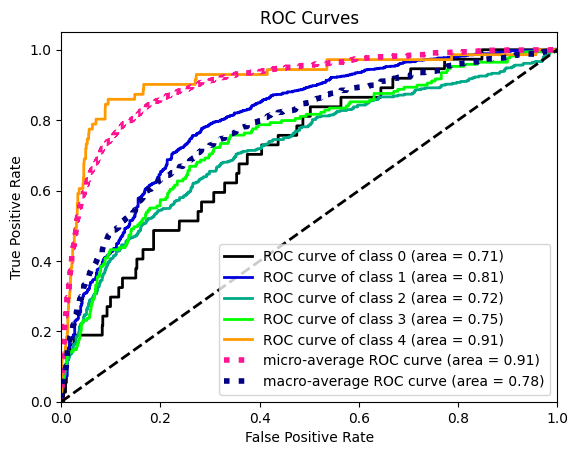

In [17]:
skplt.metrics.plot_roc_curve(y_test, model.predict_proba(X_test))
plt.show()

In [57]:

pickle.dump(model, open("model/model_100_boosted_forest.pkl", "wb"))

In [58]:
model = pickle.load(open("model/model_100_boosted_forest.pkl", "rb"))

In [10]:
input_d = output_df.drop(columns = ["OBSERVATION","ORGANISM","UNIPROT","EC Number",
                                        "EXACT","SEQUENCE","range","TEMPERATURE OPTIMUM"])
output_d = output_df["TEMPERATURE OPTIMUM"]

In [11]:
input_d = input_d.reset_index()

In [12]:
unnamed_cols  =  input_d.columns.str.contains('Unnamed')
input_d = input_d.drop(input_d[input_d.columns[unnamed_cols]], axis=1)
input_d = input_d.drop(columns=["index"], axis = 1)
input_d

A         C         D         E         F         G         H  \
0     0.093190  0.017921  0.057348  0.046595  0.025090  0.089606  0.017921   
1     0.063091  0.009464  0.053628  0.063091  0.031546  0.104101  0.012618   
2     0.097983  0.014409  0.043228  0.072046  0.017291  0.100865  0.020173   
3     0.130312  0.028329  0.087819  0.062323  0.014164  0.107649  0.033994   
4     0.083333  0.017241  0.037356  0.074713  0.025862  0.123563  0.031609   
...        ...       ...       ...       ...       ...       ...       ...   
9497  0.108434  0.004016  0.040161  0.040161  0.012048  0.084337  0.040161   
9498  0.136364  0.005051  0.030303  0.010101  0.065657  0.085859  0.025253   
9499  0.116541  0.007519  0.041353  0.045113  0.030075  0.048872  0.000000   
9500  0.047855  0.013201  0.049505  0.052805  0.052805  0.072607  0.016502   
9501  0.064593  0.000000  0.074163  0.076555  0.028708  0.071770  0.011962   

             I         K         L  ...     d21.1     d22.1    d23.1  \
0     0.075269  0.078853  0.064516  ...  0.033836  0.031867  0.03383   
1     0.123028  0.069401  0.082019  ...  0.033836  0.031867  0.03383   
2     0.069164  0.066282  0.092219  ...  0.033836  0.031867  0.03383   
3     0.016997  0.005666  0.084986  ...  0.033836  0.031867  0.03383   
4     0.063218  0.060345  0.077586  ...  0.033836  0.031867  0.03383   
...        ...       ...       ...  ...       ...       ...      ...   
9497  0.036145  0.032129  0.156627  ...  0.033836  0.031867  0.03383   
9498  0.040404  0.005051  0.161616  ...  0.033836  0.031867  0.03383   
9499  0.071429  0.052632  0.097744  ...  0.033836  0.031867  0.03383   
9500  0.052805  0.037954  0.151815  ...  0.033836  0.031867  0.03383   
9501  0.081340  0.086124  0.100478  ...  0.033836  0.031867  0.03383   

         d24.1     d25.1     d26.1     d27.1     d28.1     d29.1     d30.1  
0     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
1     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
2     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
3     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
4     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
...        ...       ...       ...       ...       ...       ...       ...  
9497  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
9498  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
9499  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
9500  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
9501  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  

[9502 rows x 9969 columns]

In [13]:
input_d.dtypes

A        float64
C        float64
D        float64
E        float64
F        float64
          ...   
d26.1    float64
d27.1    float64
d28.1    float64
d29.1    float64
d30.1    float64
Length: 9969, dtype: object

In [14]:
output_d = output_d.reset_index()
output_d 

index  TEMPERATURE OPTIMUM
0         0                 35.0
1         1                 83.0
2         2                 80.0
3         3                 80.0
4         4                 80.0
...     ...                  ...
9497   9560                 22.0
9498   9561                 22.0
9499   9562                 22.0
9500   9563                 37.0
9501   9564                 22.0

[9502 rows x 2 columns]

In [15]:
output_d = output_d.drop(columns=["index"], axis = 1)
output_d

TEMPERATURE OPTIMUM
0                    35.0
1                    83.0
2                    80.0
3                    80.0
4                    80.0
...                   ...
9497                 22.0
9498                 22.0
9499                 22.0
9500                 37.0
9501                 22.0

[9502 rows x 1 columns]

In [16]:
input_d_2 = input_d
input_d_2["topt"] = output_d

In [17]:
output_d

TEMPERATURE OPTIMUM
0                    35.0
1                    83.0
2                    80.0
3                    80.0
4                    80.0
...                   ...
9497                 22.0
9498                 22.0
9499                 22.0
9500                 37.0
9501                 22.0

[9502 rows x 1 columns]

In [18]:
from verstack.stratified_continuous_split import scsplit
train, test = scsplit(input_d_2, stratify = input_d_2["topt"],test_size = 0.2,
                                             train_size = 0.7, random_state = 0)

In [19]:
train

A         C         D         E         F         G         H  \
5308  0.070881  0.009579  0.076628  0.044061  0.070881  0.074713  0.022989   
5763  0.112165  0.000000  0.061384  0.055804  0.033482  0.117746  0.012277   
7047  0.083113  0.009235  0.067282  0.040897  0.050132  0.085752  0.017150   
5017  0.119792  0.007812  0.054688  0.046875  0.041667  0.085938  0.020833   
7865  0.070381  0.011730  0.043988  0.079179  0.058651  0.070381  0.032258   
...        ...       ...       ...       ...       ...       ...       ...   
7344  0.123596  0.014045  0.050562  0.067416  0.025281  0.070225  0.033708   
1280  0.069652  0.016584  0.076285  0.039801  0.048093  0.066335  0.021559   
5598  0.088795  0.006342  0.090909  0.054968  0.033827  0.103594  0.033827   
694   0.047059  0.007843  0.066667  0.072549  0.047059  0.052941  0.045098   
3907  0.063712  0.016620  0.047091  0.072022  0.036011  0.091413  0.024931   

             I         K         L  ...     d22.1    d23.1     d24.1  \
5308  0.067050  0.057471  0.078544  ...  0.031867  0.03383  0.031876   
5763  0.035714  0.044085  0.085379  ...  0.031867  0.03383  0.031876   
7047  0.047493  0.044855  0.075198  ...  0.031867  0.03383  0.031876   
5017  0.059896  0.023438  0.093750  ...  0.031867  0.03383  0.031876   
7865  0.055718  0.070381  0.079179  ...  0.031867  0.03383  0.031876   
...        ...       ...       ...  ...       ...      ...       ...   
7344  0.050562  0.036517  0.101124  ...  0.031867  0.03383  0.031876   
1280  0.053068  0.067993  0.069652  ...  0.031867  0.03383  0.031876   
5598  0.054968  0.021142  0.086681  ...  0.031867  0.03383  0.031876   
694   0.058824  0.045098  0.080392  ...  0.031867  0.03383  0.031876   
3907  0.069252  0.069252  0.099723  ...  0.031867  0.03383  0.031876   

         d25.1     d26.1     d27.1     d28.1     d29.1     d30.1  topt  
5308  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  40.0  
5763  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  37.0  
7047  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  40.0  
5017  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  37.0  
7865  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  22.0  
...        ...       ...       ...       ...       ...       ...   ...  
7344  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  42.5  
1280  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  25.0  
5598  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  40.0  
694   0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  60.0  
3907  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  37.0  

[6651 rows x 9970 columns]

In [20]:
temp = train["topt"]
fig = px.box(train,y="topt",points="all")
fig.show()

In [21]:
# implement SMOTER
# see paper: https://core.ac.uk/download/pdf/29202178.pdf
from sklearn.neighbors import KNeighborsRegressor
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relevance(x):
    x = np.array(x)
    return sigmoid(x - 50)

def get_synth_cases(D, target, o=200, k=3, categorical_col = []):
    '''
    Function to generate the new cases.
    INPUT:
        D - pd.DataFrame with the initial data
        target - string name of the target column in the dataset
        o - oversampling rate
        k - number of nearest neighbors to use for the generation
        categorical_col - list of categorical column names
    OUTPUT:
        new_cases - pd.DataFrame containing new generated cases
    '''
    new_cases = pd.DataFrame(columns = D.columns) # initialize the list of new cases 
    ng = o // 100 # the number of new cases to generate
    for index, case in D.iterrows():
        # find k nearest neighbors of the case
        knn = KNeighborsRegressor(n_neighbors = k+1) # k+1 because the case is the nearest neighbor to itself
        knn.fit(D.drop(columns = [target]).values, D[[target]])
        neighbors = knn.kneighbors(case.drop(labels = [target]).values.reshape(1, -1), return_distance=False).reshape(-1)
        neighbors = np.delete(neighbors, np.where(neighbors == index))
        for i in range(0, ng):
            # randomly choose one of the neighbors
            x = D.iloc[neighbors[np.random.randint(k)]]
            attr = {}          
            for a in D.columns:
                # skip target column
                if a == target:
                    continue;
                if a in categorical_col:
                    # if categorical then choose randomly one of values
                    if np.random.randint(2) == 0:
                        attr[a] = case[a]
                    else:
                        attr[a] = x[a]
                else:
                    # if continious column
                    diff = case[a] - x[a]
                    attr[a] = case[a] + np.random.randint(2) * diff
            # decide the target column
            new = np.array(list(attr.values()))
            d1 = cosine_similarity(new.reshape(1, -1), case.drop(labels = [target]).values.reshape(1, -1))[0][0]
            d2 = cosine_similarity(new.reshape(1, -1), x.drop(labels = [target]).values.reshape(1, -1))[0][0]
            attr[target] = (d2 * case[target] + d1 * x[target]) / (d1 + d2)
            
            # append the result
            new_cases = new_cases.append(attr,ignore_index = True)
                    
    return new_cases

def SmoteR(D, target, th = 0.999, o = 200, u = 100, k = 3, categorical_col = []):
    '''
    The implementation of SmoteR algorithm:
    https://core.ac.uk/download/pdf/29202178.pdf
    INPUT:
        D - pd.DataFrame - the initial dataset
        target - the name of the target column in the dataset
        th - relevance threshold
        o - oversampling rate
        u - undersampling rate
        k - the number of nearest neighbors
    OUTPUT:
        new_D - the resulting new dataset
    '''
    # median of the target variable
    y_bar = D[target].median()
    
    # find rare cases where target less than median
    rareL = D[(relevance(D[target]) > th) & (D[target] > y_bar)]  
    # generate rare cases for rareL
    new_casesL = get_synth_cases(rareL, target, o, k , categorical_col)
    
    # find rare cases where target greater than median
    rareH = D[(relevance(D[target]) > th) & (D[target] < y_bar)]
    # generate rare cases for rareH
    new_casesH = get_synth_cases(rareH, target, o, k , categorical_col)
    
    new_cases = pd.concat([new_casesL, new_casesH], axis=0)
    
    # undersample norm cases
    norm_cases = D[relevance(D[target]) <= th]
    # get the number of norm cases
    nr_norm = int(len(norm_cases) * u / 100)
    
    norm_cases = norm_cases.sample(min(len(D[relevance(D[target]) <= th]), nr_norm))
    
    # get the resulting dataset
    new_D = pd.concat([new_cases, norm_cases], axis=0)
    
    return new_D

In [22]:
train

A         C         D         E         F         G         H  \
5308  0.070881  0.009579  0.076628  0.044061  0.070881  0.074713  0.022989   
5763  0.112165  0.000000  0.061384  0.055804  0.033482  0.117746  0.012277   
7047  0.083113  0.009235  0.067282  0.040897  0.050132  0.085752  0.017150   
5017  0.119792  0.007812  0.054688  0.046875  0.041667  0.085938  0.020833   
7865  0.070381  0.011730  0.043988  0.079179  0.058651  0.070381  0.032258   
...        ...       ...       ...       ...       ...       ...       ...   
7344  0.123596  0.014045  0.050562  0.067416  0.025281  0.070225  0.033708   
1280  0.069652  0.016584  0.076285  0.039801  0.048093  0.066335  0.021559   
5598  0.088795  0.006342  0.090909  0.054968  0.033827  0.103594  0.033827   
694   0.047059  0.007843  0.066667  0.072549  0.047059  0.052941  0.045098   
3907  0.063712  0.016620  0.047091  0.072022  0.036011  0.091413  0.024931   

             I         K         L  ...     d22.1    d23.1     d24.1  \
5308  0.067050  0.057471  0.078544  ...  0.031867  0.03383  0.031876   
5763  0.035714  0.044085  0.085379  ...  0.031867  0.03383  0.031876   
7047  0.047493  0.044855  0.075198  ...  0.031867  0.03383  0.031876   
5017  0.059896  0.023438  0.093750  ...  0.031867  0.03383  0.031876   
7865  0.055718  0.070381  0.079179  ...  0.031867  0.03383  0.031876   
...        ...       ...       ...  ...       ...      ...       ...   
7344  0.050562  0.036517  0.101124  ...  0.031867  0.03383  0.031876   
1280  0.053068  0.067993  0.069652  ...  0.031867  0.03383  0.031876   
5598  0.054968  0.021142  0.086681  ...  0.031867  0.03383  0.031876   
694   0.058824  0.045098  0.080392  ...  0.031867  0.03383  0.031876   
3907  0.069252  0.069252  0.099723  ...  0.031867  0.03383  0.031876   

         d25.1     d26.1     d27.1     d28.1     d29.1     d30.1  topt  
5308  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  40.0  
5763  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  37.0  
7047  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  40.0  
5017  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  37.0  
7865  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  22.0  
...        ...       ...       ...       ...       ...       ...   ...  
7344  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  42.5  
1280  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  25.0  
5598  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  40.0  
694   0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  60.0  
3907  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  37.0  

[6651 rows x 9970 columns]

In [28]:
Xs = SmoteR(train,"topt")
Xs

A         C         D         E         F         G         H  \
0     0.054860  0.009625  0.060635  0.047161  0.036574  0.062560  0.015399   
1     0.054860  0.009625  0.060635  0.047161  0.036574  0.062560  0.015399   
2     0.098532  0.010482  0.039832  0.106918  0.048218  0.073375  0.029350   
3     0.098532  0.007103  0.039832  0.118787  0.048218  0.057642  0.025037   
4     0.087059  0.011765  0.106431  0.078327  0.049653  0.068235  0.030588   
...        ...       ...       ...       ...       ...       ...       ...   
3440  0.086172  0.010020  0.052104  0.070140  0.038076  0.098196  0.010020   
1559  0.104167  0.023810  0.047619  0.065476  0.014881  0.059524  0.026786   
1133  0.070833  0.012500  0.047917  0.060417  0.070833  0.064583  0.018750   
7689  0.069801  0.025641  0.058405  0.058405  0.042735  0.101140  0.029915   
637   0.054701  0.023932  0.049573  0.059829  0.051282  0.085470  0.018803   

             I         K         L  ...     d22.1    d23.1     d24.1  \
0     0.067372  0.065448  0.062560  ...  0.031867  0.03383  0.031876   
1     0.067372  0.065448  0.062560  ...  0.031867  0.03383  0.031876   
2     0.039832  0.050314  0.094340  ...  0.031867  0.03383  0.031876   
3     0.039832  0.072906  0.094340  ...  0.031867  0.03383  0.031876   
4     0.078327  0.068235  0.077647  ...  0.031867  0.03383  0.031876   
...        ...       ...       ...  ...       ...      ...       ...   
3440  0.060120  0.056112  0.084168  ...  0.031867  0.03383  0.031876   
1559  0.041667  0.068452  0.092262  ...  0.031867  0.03383  0.031876   
1133  0.060417  0.089583  0.102083  ...  0.031867  0.03383  0.031876   
7689  0.048433  0.045584  0.102564  ...  0.031867  0.03383  0.031876   
637   0.059829  0.075214  0.071795  ...  0.031867  0.03383  0.031876   

         d25.1     d26.1     d27.1     d28.1     d29.1     d30.1  topt  
0     0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  85.0  
1     0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  85.0  
2     0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  70.0  
3     0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  65.0  
4     0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  77.5  
...        ...       ...       ...       ...       ...       ...   ...  
3440  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  30.0  
1559  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  25.0  
1133  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  30.0  
7689  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  37.0  
637   0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  25.0  

[7838 rows x 9970 columns]

In [29]:
temp = Xs["topt"]
fig = px.box(Xs,y="topt",points="all")
fig.show()

In [30]:
temp = test["topt"]
fig = px.box(test,y="topt",points="all")
fig.show()

In [23]:
train = train.reset_index()

In [24]:
train = train.drop(columns = ["index"], axis = 1)

In [25]:
train

A         C         D         E         F         G         H  \
0     0.070881  0.009579  0.076628  0.044061  0.070881  0.074713  0.022989   
1     0.112165  0.000000  0.061384  0.055804  0.033482  0.117746  0.012277   
2     0.083113  0.009235  0.067282  0.040897  0.050132  0.085752  0.017150   
3     0.119792  0.007812  0.054688  0.046875  0.041667  0.085938  0.020833   
4     0.070381  0.011730  0.043988  0.079179  0.058651  0.070381  0.032258   
...        ...       ...       ...       ...       ...       ...       ...   
6646  0.123596  0.014045  0.050562  0.067416  0.025281  0.070225  0.033708   
6647  0.069652  0.016584  0.076285  0.039801  0.048093  0.066335  0.021559   
6648  0.088795  0.006342  0.090909  0.054968  0.033827  0.103594  0.033827   
6649  0.047059  0.007843  0.066667  0.072549  0.047059  0.052941  0.045098   
6650  0.063712  0.016620  0.047091  0.072022  0.036011  0.091413  0.024931   

             I         K         L  ...     d22.1    d23.1     d24.1  \
0     0.067050  0.057471  0.078544  ...  0.031867  0.03383  0.031876   
1     0.035714  0.044085  0.085379  ...  0.031867  0.03383  0.031876   
2     0.047493  0.044855  0.075198  ...  0.031867  0.03383  0.031876   
3     0.059896  0.023438  0.093750  ...  0.031867  0.03383  0.031876   
4     0.055718  0.070381  0.079179  ...  0.031867  0.03383  0.031876   
...        ...       ...       ...  ...       ...      ...       ...   
6646  0.050562  0.036517  0.101124  ...  0.031867  0.03383  0.031876   
6647  0.053068  0.067993  0.069652  ...  0.031867  0.03383  0.031876   
6648  0.054968  0.021142  0.086681  ...  0.031867  0.03383  0.031876   
6649  0.058824  0.045098  0.080392  ...  0.031867  0.03383  0.031876   
6650  0.069252  0.069252  0.099723  ...  0.031867  0.03383  0.031876   

         d25.1     d26.1     d27.1     d28.1     d29.1     d30.1  topt  
0     0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  40.0  
1     0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  37.0  
2     0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  40.0  
3     0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  37.0  
4     0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  22.0  
...        ...       ...       ...       ...       ...       ...   ...  
6646  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  42.5  
6647  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  25.0  
6648  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  40.0  
6649  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  60.0  
6650  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  37.0  

[6651 rows x 9970 columns]

In [26]:
train
X_train = train.drop(columns = ["topt"], axis = 1 )
y_train = train["topt"]

In [35]:
Xs = Xs.reset_index()

In [36]:
Xs = Xs.drop(columns=["index"], axis = 1)
X_train = Xs.drop(columns = ["topt"], axis = 1 )
y_train = Xs["topt"]

In [27]:
X_train

A         C         D         E         F         G         H  \
0     0.070881  0.009579  0.076628  0.044061  0.070881  0.074713  0.022989   
1     0.112165  0.000000  0.061384  0.055804  0.033482  0.117746  0.012277   
2     0.083113  0.009235  0.067282  0.040897  0.050132  0.085752  0.017150   
3     0.119792  0.007812  0.054688  0.046875  0.041667  0.085938  0.020833   
4     0.070381  0.011730  0.043988  0.079179  0.058651  0.070381  0.032258   
...        ...       ...       ...       ...       ...       ...       ...   
6646  0.123596  0.014045  0.050562  0.067416  0.025281  0.070225  0.033708   
6647  0.069652  0.016584  0.076285  0.039801  0.048093  0.066335  0.021559   
6648  0.088795  0.006342  0.090909  0.054968  0.033827  0.103594  0.033827   
6649  0.047059  0.007843  0.066667  0.072549  0.047059  0.052941  0.045098   
6650  0.063712  0.016620  0.047091  0.072022  0.036011  0.091413  0.024931   

             I         K         L  ...     d21.1     d22.1    d23.1  \
0     0.067050  0.057471  0.078544  ...  0.033836  0.031867  0.03383   
1     0.035714  0.044085  0.085379  ...  0.033836  0.031867  0.03383   
2     0.047493  0.044855  0.075198  ...  0.033836  0.031867  0.03383   
3     0.059896  0.023438  0.093750  ...  0.033836  0.031867  0.03383   
4     0.055718  0.070381  0.079179  ...  0.033836  0.031867  0.03383   
...        ...       ...       ...  ...       ...       ...      ...   
6646  0.050562  0.036517  0.101124  ...  0.033836  0.031867  0.03383   
6647  0.053068  0.067993  0.069652  ...  0.033836  0.031867  0.03383   
6648  0.054968  0.021142  0.086681  ...  0.033836  0.031867  0.03383   
6649  0.058824  0.045098  0.080392  ...  0.033836  0.031867  0.03383   
6650  0.069252  0.069252  0.099723  ...  0.033836  0.031867  0.03383   

         d24.1     d25.1     d26.1     d27.1     d28.1     d29.1     d30.1  
0     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
1     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
2     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
3     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
4     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
...        ...       ...       ...       ...       ...       ...       ...  
6646  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
6647  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
6648  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
6649  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
6650  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  

[6651 rows x 9969 columns]

In [28]:
test
test = test.reset_index()
test = test.drop(columns = ["index"], axis = 1)
X_test = test.drop(columns = ["topt"], axis = 1 )
y_test = test["topt"]

In [29]:
X_test

A         C         D         E         F         G         H  \
0     0.074157  0.011236  0.058427  0.074157  0.065169  0.092135  0.026966   
1     0.183374  0.007335  0.063570  0.068460  0.036675  0.088020  0.014670   
2     0.073113  0.016509  0.054245  0.040094  0.066038  0.068396  0.028302   
3     0.064024  0.012195  0.033537  0.064024  0.030488  0.051829  0.021341   
4     0.065089  0.011834  0.043393  0.080868  0.033531  0.076923  0.027613   
...        ...       ...       ...       ...       ...       ...       ...   
1896  0.061224  0.020408  0.048469  0.030612  0.040816  0.079082  0.020408   
1897  0.050676  0.011824  0.055743  0.028716  0.030405  0.221284  0.027027   
1898  0.032338  0.002488  0.057214  0.062189  0.062189  0.032338  0.012438   
1899  0.041045  0.000000  0.011194  0.134328  0.041045  0.104478  0.007463   
1900  0.069880  0.012048  0.038554  0.086747  0.065060  0.043373  0.038554   

             I         K         L  ...     d21.1     d22.1    d23.1  \
0     0.047191  0.056180  0.080899  ...  0.033836  0.031867  0.03383   
1     0.044010  0.031785  0.073350  ...  0.033836  0.031867  0.03383   
2     0.042453  0.056604  0.094340  ...  0.033836  0.031867  0.03383   
3     0.060976  0.073171  0.115854  ...  0.033836  0.031867  0.03383   
4     0.067061  0.035503  0.102564  ...  0.033836  0.031867  0.03383   
...        ...       ...       ...  ...       ...       ...      ...   
1896  0.056122  0.051020  0.071429  ...  0.033836  0.031867  0.03383   
1897  0.047297  0.042230  0.057432  ...  0.033836  0.031867  0.03383   
1898  0.136816  0.094527  0.079602  ...  0.033836  0.031867  0.03383   
1899  0.093284  0.055970  0.108209  ...  0.033836  0.031867  0.03383   
1900  0.067470  0.048193  0.098795  ...  0.033836  0.031867  0.03383   

         d24.1     d25.1     d26.1     d27.1     d28.1     d29.1     d30.1  
0     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
1     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
2     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
3     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
4     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
...        ...       ...       ...       ...       ...       ...       ...  
1896  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
1897  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
1898  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
1899  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
1900  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  

[1901 rows x 9969 columns]

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
  
# transform data
X_train_s = scaler.fit_transform(X_train)
X_train_s = pd.DataFrame(X_train_s, columns = X_train.columns)

In [31]:
X_train_s

A         C         D         E         F         G         H  \
0    -0.430302 -0.353063  1.284128 -0.908846  2.183751 -0.136528 -0.082498   
1     0.993985 -1.232488  0.234762 -0.364325 -0.562633  1.911279 -1.131274   
2    -0.008293 -0.384620  0.640784 -1.055578  0.660036  0.388801 -0.654103   
3     1.257097 -0.515207 -0.226194 -0.778367  0.038394  0.397630 -0.293510   
4    -0.447551 -0.155515 -0.962687  0.719651  1.285632 -0.342646  0.825077   
...        ...       ...       ...       ...       ...       ...       ...   
6646  1.388329  0.057005 -0.510191  0.174162 -1.164887 -0.350094  0.967026   
6647 -0.472719  0.290098  1.260510 -1.106408  0.510299 -0.535195 -0.222473   
6648  0.187717 -0.650171  2.267158 -0.403060 -0.537335  1.237854  0.978655   
6649 -1.252169 -0.512394  0.598405  0.412206  0.434364 -1.172567  2.082228   
6650 -0.677642  0.293472 -0.749079  0.387774 -0.376921  0.658180  0.107665   

             I         K         L  ...  d21.1         d22.1         d23.1  \
0     0.558837  0.094789 -0.462673  ...    0.0 -6.938894e-18  6.938894e-18   
1    -1.014218 -0.460792 -0.150935  ...    0.0 -6.938894e-18  6.938894e-18   
2    -0.422902 -0.428832 -0.615280  ...    0.0 -6.938894e-18  6.938894e-18   
3     0.199704 -1.317722  0.230815  ...    0.0 -6.938894e-18  6.938894e-18   
4    -0.010001  0.630594 -0.433721  ...    0.0 -6.938894e-18  6.938894e-18   
...        ...       ...       ...  ...    ...           ...           ...   
6646 -0.268868 -0.774887  0.567098  ...    0.0 -6.938894e-18  6.938894e-18   
6647 -0.143056  0.531490 -0.868219  ...    0.0 -6.938894e-18  6.938894e-18   
6648 -0.047660 -1.413007 -0.091588  ...    0.0 -6.938894e-18  6.938894e-18   
6649  0.145874 -0.418740 -0.378388  ...    0.0 -6.938894e-18  6.938894e-18   
6650  0.669391  0.583730  0.503221  ...    0.0 -6.938894e-18  6.938894e-18   

             d24.1         d25.1         d26.1         d27.1         d28.1  \
0    -1.387779e-17  3.469447e-18  6.938894e-18  6.938894e-18  1.040834e-17   
1    -1.387779e-17  3.469447e-18  6.938894e-18  6.938894e-18  1.040834e-17   
2    -1.387779e-17  3.469447e-18  6.938894e-18  6.938894e-18  1.040834e-17   
3    -1.387779e-17  3.469447e-18  6.938894e-18  6.938894e-18  1.040834e-17   
4    -1.387779e-17  3.469447e-18  6.938894e-18  6.938894e-18  1.040834e-17   
...            ...           ...           ...           ...           ...   
6646 -1.387779e-17  3.469447e-18  6.938894e-18  6.938894e-18  1.040834e-17   
6647 -1.387779e-17  3.469447e-18  6.938894e-18  6.938894e-18  1.040834e-17   
6648 -1.387779e-17  3.469447e-18  6.938894e-18  6.938894e-18  1.040834e-17   
6649 -1.387779e-17  3.469447e-18  6.938894e-18  6.938894e-18  1.040834e-17   
6650 -1.387779e-17  3.469447e-18  6.938894e-18  6.938894e-18  1.040834e-17   

             d29.1  d30.1  
0    -6.938894e-18    0.0  
1    -6.938894e-18    0.0  
2    -6.938894e-18    0.0  
3    -6.938894e-18    0.0  
4    -6.938894e-18    0.0  
...            ...    ...  
6646 -6.938894e-18    0.0  
6647 -6.938894e-18    0.0  
6648 -6.938894e-18    0.0  
6649 -6.938894e-18    0.0  
6650 -6.938894e-18    0.0  

[6651 rows x 9969 columns]

In [32]:
unnamed_cols  =  X_test.columns.str.contains('Unnamed')
X_test = X_test.drop(X_test[X_test.columns[unnamed_cols]], axis=1)
X_test

A         C         D         E         F         G         H  \
0     0.074157  0.011236  0.058427  0.074157  0.065169  0.092135  0.026966   
1     0.183374  0.007335  0.063570  0.068460  0.036675  0.088020  0.014670   
2     0.073113  0.016509  0.054245  0.040094  0.066038  0.068396  0.028302   
3     0.064024  0.012195  0.033537  0.064024  0.030488  0.051829  0.021341   
4     0.065089  0.011834  0.043393  0.080868  0.033531  0.076923  0.027613   
...        ...       ...       ...       ...       ...       ...       ...   
1896  0.061224  0.020408  0.048469  0.030612  0.040816  0.079082  0.020408   
1897  0.050676  0.011824  0.055743  0.028716  0.030405  0.221284  0.027027   
1898  0.032338  0.002488  0.057214  0.062189  0.062189  0.032338  0.012438   
1899  0.041045  0.000000  0.011194  0.134328  0.041045  0.104478  0.007463   
1900  0.069880  0.012048  0.038554  0.086747  0.065060  0.043373  0.038554   

             I         K         L  ...     d21.1     d22.1    d23.1  \
0     0.047191  0.056180  0.080899  ...  0.033836  0.031867  0.03383   
1     0.044010  0.031785  0.073350  ...  0.033836  0.031867  0.03383   
2     0.042453  0.056604  0.094340  ...  0.033836  0.031867  0.03383   
3     0.060976  0.073171  0.115854  ...  0.033836  0.031867  0.03383   
4     0.067061  0.035503  0.102564  ...  0.033836  0.031867  0.03383   
...        ...       ...       ...  ...       ...       ...      ...   
1896  0.056122  0.051020  0.071429  ...  0.033836  0.031867  0.03383   
1897  0.047297  0.042230  0.057432  ...  0.033836  0.031867  0.03383   
1898  0.136816  0.094527  0.079602  ...  0.033836  0.031867  0.03383   
1899  0.093284  0.055970  0.108209  ...  0.033836  0.031867  0.03383   
1900  0.067470  0.048193  0.098795  ...  0.033836  0.031867  0.03383   

         d24.1     d25.1     d26.1     d27.1     d28.1     d29.1     d30.1  
0     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
1     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
2     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
3     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
4     0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
...        ...       ...       ...       ...       ...       ...       ...  
1896  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
1897  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
1898  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
1899  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  
1900  0.031876  0.030197  0.033369  0.032534  0.028335  0.032076  0.032111  

[1901 rows x 9969 columns]

In [33]:
X_test_s = scaler.fit_transform(X_test)
X_test_s = pd.DataFrame(X_test_s, columns = X_test.columns)
X_test_s

A         C         D         E         F         G         H  \
0    -0.334263 -0.196268  0.020441  0.462761  1.826554  0.662039  0.328254   
1     3.452200 -0.588338  0.372192  0.206948 -0.291510  0.469662 -0.914361   
2    -0.370461  0.333744 -0.265577 -1.066597  1.891165 -0.447676  0.463223   
3    -0.685564 -0.099867 -1.682010  0.007814 -0.751418 -1.222136 -0.240166   
4    -0.648663 -0.136129 -1.007885  0.764051 -0.525236 -0.049069  0.393649   
...        ...       ...       ...       ...       ...       ...       ...   
1896 -0.782634  0.725586 -0.660637 -1.492324  0.016347  0.051838 -0.334481   
1897 -1.148353 -0.137134 -0.163120 -1.577452 -0.757543  6.699400  0.334392   
1898 -1.784096 -1.075527 -0.062528 -0.074589  1.605076 -2.133285 -1.139929   
1899 -1.482249 -1.325540 -3.210195  3.164320  0.033328  1.239031 -1.642692   
1900 -0.482571 -0.114634 -1.338814  1.028012  1.818504 -1.617420  1.499277   

             I         K         L  ...         d21.1  d22.1         d23.1  \
0    -0.442595  0.056844 -0.391259  ...  6.938894e-18    0.0  6.938894e-18   
1    -0.599006 -0.965826 -0.754309  ...  6.938894e-18    0.0  6.938894e-18   
2    -0.675556  0.074619  0.255119  ...  6.938894e-18    0.0  6.938894e-18   
3     0.235146  0.769129  1.289748  ...  6.938894e-18    0.0  6.938894e-18   
4     0.534351 -0.809957  0.650641  ...  6.938894e-18    0.0  6.938894e-18   
...        ...       ...       ...  ...           ...    ...           ...   
1896 -0.003467 -0.159444 -0.846694  ...  6.938894e-18    0.0  6.938894e-18   
1897 -0.437370 -0.527961 -1.519781  ...  6.938894e-18    0.0  6.938894e-18   
1898  3.963954  1.664430 -0.453627  ...  6.938894e-18    0.0  6.938894e-18   
1899  1.823618  0.048057  0.922107  ...  6.938894e-18    0.0  6.938894e-18   
1900  0.554447 -0.277982  0.469390  ...  6.938894e-18    0.0  6.938894e-18   

             d24.1  d25.1         d26.1         d27.1         d28.1  \
0    -6.938894e-18    0.0  1.387779e-17  6.938894e-18  6.938894e-18   
1    -6.938894e-18    0.0  1.387779e-17  6.938894e-18  6.938894e-18   
2    -6.938894e-18    0.0  1.387779e-17  6.938894e-18  6.938894e-18   
3    -6.938894e-18    0.0  1.387779e-17  6.938894e-18  6.938894e-18   
4    -6.938894e-18    0.0  1.387779e-17  6.938894e-18  6.938894e-18   
...            ...    ...           ...           ...           ...   
1896 -6.938894e-18    0.0  1.387779e-17  6.938894e-18  6.938894e-18   
1897 -6.938894e-18    0.0  1.387779e-17  6.938894e-18  6.938894e-18   
1898 -6.938894e-18    0.0  1.387779e-17  6.938894e-18  6.938894e-18   
1899 -6.938894e-18    0.0  1.387779e-17  6.938894e-18  6.938894e-18   
1900 -6.938894e-18    0.0  1.387779e-17  6.938894e-18  6.938894e-18   

             d29.1         d30.1  
0    -1.387779e-17  6.938894e-18  
1    -1.387779e-17  6.938894e-18  
2    -1.387779e-17  6.938894e-18  
3    -1.387779e-17  6.938894e-18  
4    -1.387779e-17  6.938894e-18  
...            ...           ...  
1896 -1.387779e-17  6.938894e-18  
1897 -1.387779e-17  6.938894e-18  
1898 -1.387779e-17  6.938894e-18  
1899 -1.387779e-17  6.938894e-18  
1900 -1.387779e-17  6.938894e-18  

[1901 rows x 9969 columns]

In [34]:
model2 = xgb.XGBRegressor(
                         num_parallel_tree = 100,
                         max_depth = 5,
                         n_estimators=200,
                         learning_rate = 0.05,
                         verbosity = 2,
                         booster = 'gbtree',
                         n_jobs = -1,
                         sampling_method ='uniform',
                         subsample = 0.5,
                         colsample_bytree = 0.3,
                         objective ='reg:squarederror',
                         gamma = 10,
                         reg_alpha = 5,
                         reg_lambda =5,
                         eval_metric = ["rmse"], max_bin = 1000,max_leaves = 10
                        )

In [35]:
model2.fit(X_train,y_train,eval_set=[(X_test, y_test)],early_stopping_rounds=10)

[13:35:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 42 extra nodes, 2 pruned nodes, max_depth=5
[13:35:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[13:35:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[13:35:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 38 extra nodes, 2 pruned nodes, max_depth=5
[13:35:23] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1

In [46]:
r2_scr = r2_score(y_test,model2.predict(X_test_s),multioutput = "raw_values") 
r2_scr

array([-1.15573016])

In [23]:
model2.predict(X_test)

array([37.635883, 37.01776 , 44.33336 , ..., 31.790035, 38.878212,
       51.735832], dtype=float32)

In [24]:
y_test

8084    25.0
4666    37.0
7637    20.0
5339    22.0
6800    35.0
        ... 
8240    45.0
8512    37.0
3480    30.0
5703    50.0
6154    40.0
Name: TEMPERATURE OPTIMUM, Length: 2851, dtype: float64

In [21]:
r2_scr = r2_score(y_train,model2.predict(X_train)) 
r2_scr

0.9086555735075101

In [26]:
pickle.dump(model2, open("model/model_300reg_boosted_forest.pkl", "wb"))